In [11]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train = pd.read_csv('train.csv')

In [10]:
train.shape

(159256, 24)

In [17]:
#null 값 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [40]:
#column 확인
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

- Column

    age: 나이 \
    height: 키 \
    weight: 몸무게\
    waist: 허리\
    eyesight(left): 시력(왼)\
    eyesight(light): 시력(오)\
    hearing(left): 청력(왼)\
    hearing(light): 청력(오)\
    systolic: 수축기 혈압\
    relaxation: 이완기 혈압\
    fasting blood sugar: 공복혈당\
    Cholesterol: 콜레스테롤\
    triglyceride: 중성지방\
    HDL: 고밀도 지단백\
    LDL: 저밀도 지단백\
    hemoglobin: 헤모글로빈\
    Urine protein: 요단백\
    serum creatinine: 혈청크레아티닌\
    AST: 간수치 AST\
    ALT: 간수치 ALT\
    Gtp: 감마 Gtp\
    dental caries: 충치여부\
    smoking: 흡연여부




- 추가 Column

    BMI  = weight/ (height / 100) ** 2\
    맥압 = 수축기 혈압 - 이완기 혈압\
    시력 좌우 평균\
    청력 좌우 평균\
    AST,ALT 평균


In [27]:
#id 중복값 제거
df_train = train.copy().drop_duplicates(subset=['id'])
df_train.shape

(159256, 24)

In [28]:
#id열 제거
df_train.drop('id', axis=1, inplace=True)

In [31]:
# 흡연자/비흡연자 비율
total_count = len(df_train)
print("흡연자 :", (df_train['smoking'].value_counts()[1] / total_count) * 100, "%")
print("비흡연자 :", (df_train['smoking'].value_counts()[0] / total_count) * 100, "%")

흡연자 : 43.736499723715276 %
비흡연자 : 56.26350027628473 %


In [33]:
#비흡연자 기술통계
df_train[df_train['smoking'] == 0].describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,...,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.000000,89603.0
mean,46.457819,161.790442,63.240349,80.927077,0.970196,0.963018,1.029128,1.028336,121.845507,76.005692,...,59.191467,116.402308,14.228271,1.082988,0.849600,25.021216,23.998705,27.809326,0.160530,0.0
std,12.166010,9.010311,12.170514,9.084383,0.419043,0.411297,0.168168,0.165932,13.379236,9.236044,...,14.483539,29.324307,1.463154,0.366582,0.190454,9.071951,14.331998,23.012251,0.367099,0.0
min,20.000000,135.000000,30.000000,56.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,15.000000,4.900000,1.000000,0.100000,6.000000,1.000000,3.000000,0.000000,0.0
25%,40.000000,155.000000,55.000000,74.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,48.000000,96.000000,13.200000,1.000000,0.700000,19.000000,15.000000,15.000000,0.000000,0.0
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,57.000000,116.000000,14.200000,1.000000,0.800000,23.000000,20.000000,21.000000,0.000000,0.0
75%,55.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,130.000000,81.000000,...,69.000000,136.000000,15.300000,1.000000,1.000000,29.000000,29.000000,32.000000,0.000000,0.0
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,20.400000,6.000000,9.900000,778.000000,745.000000,926.000000,1.000000,0.0


In [34]:
#흡연자 기술통계
df_train[df_train['smoking'] == 1].describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,...,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.000000,69653.0
mean,41.539288,169.739150,72.164961,85.671199,1.051597,1.049836,1.017343,1.017099,123.350294,77.991171,...,51.557607,112.299040,15.528544,1.062969,0.948292,26.154451,29.832714,47.030523,0.246192,1.0
std,10.799636,6.151247,11.262302,8.040383,0.374278,0.360582,0.130547,0.129641,11.787073,8.545482,...,11.966778,26.406187,0.989043,0.321822,0.146291,9.911238,20.910066,36.568546,0.430795,0.0
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,80.000000,46.000000,...,18.000000,1.000000,8.300000,1.000000,0.100000,9.000000,1.000000,2.000000,0.000000,1.0
25%,35.000000,165.000000,65.000000,80.000000,0.900000,0.900000,1.000000,1.000000,116.000000,71.000000,...,43.000000,94.000000,14.900000,1.000000,0.900000,20.000000,19.000000,26.000000,0.000000,1.0
50%,40.000000,170.000000,70.000000,85.900000,1.000000,1.000000,1.000000,1.000000,122.000000,79.000000,...,49.000000,112.000000,15.600000,1.000000,0.900000,24.000000,26.000000,37.000000,0.000000,1.0
75%,50.000000,175.000000,80.000000,91.000000,1.200000,1.200000,1.000000,1.000000,130.000000,83.000000,...,58.000000,130.000000,16.200000,1.000000,1.000000,30.000000,36.000000,57.000000,0.000000,1.0
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,203.000000,122.000000,...,135.000000,1220.000000,21.000000,5.000000,3.000000,656.000000,2914.000000,999.000000,1.000000,1.0


In [48]:
columns = ['triglyceride', 'LDL', 'AST', 'ALT', 'Gtp']


smoking_1= df_train[df_train['smoking'] == 1]
smoking_0= df_train[df_train['smoking'] == 0]


smoking_1= smoking_1[columns].agg(['max', 'mean'])
smoking_0= smoking_0[columns].agg(['max', 'mean'])


result_df = pd.concat([smoking_1, smoking_0], axis=1, keys=['Smoking=1', 'Smoking=0'])
print(result_df)


        Smoking=1                                                   \
     triglyceride         LDL         AST          ALT         Gtp   
max    766.000000  1220.00000  656.000000  2914.000000  999.000000   
mean   152.537952   112.29904   26.154451    29.832714   47.030523   

        Smoking=0                                                   
     triglyceride          LDL         AST         ALT         Gtp  
max    466.000000  1860.000000  778.000000  745.000000  926.000000  
mean   108.242972   116.402308   25.021216   23.998705   27.809326  


- 'triglyceride', 'ALT', 'Gtp'는 max와 mean 모두 흡연자가 비흡연자보다 높다.
- 'LDL', 'AST'는 max와 mean 모두 비흡연자가 흡연자보다 높다. (AST mean은 반대지만 근소한 차이)

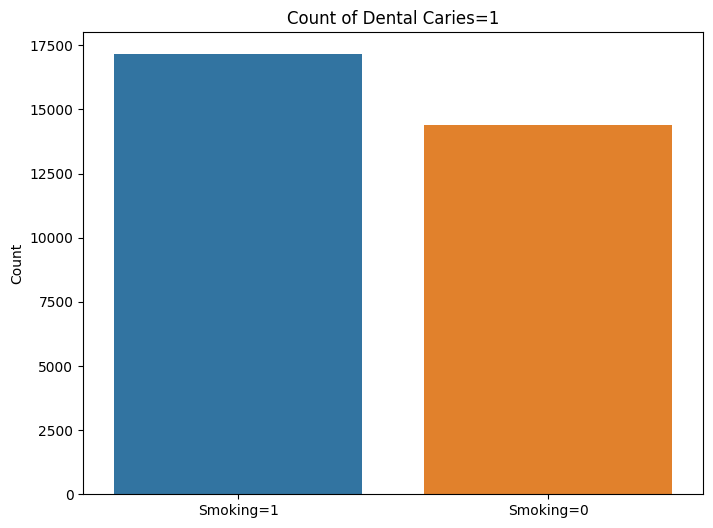

In [53]:
dental_caries_1 = df_train[df_train['dental caries'] == 1]

count_smoking_1 = dental_caries_1[dental_caries_1['smoking'] == 1]['dental caries'].count()
count_smoking_0 = dental_caries_1[dental_caries_1['smoking'] == 0]['dental caries'].count()

counts = [count_smoking_1, count_smoking_0]
labels = ['Smoking=1', 'Smoking=0']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Count of Dental Caries=1')
plt.ylabel('Count')
plt.show()


- 충치 여부는 흡연자가 비흡연자보다 크지만 큰 차이는 아니다.

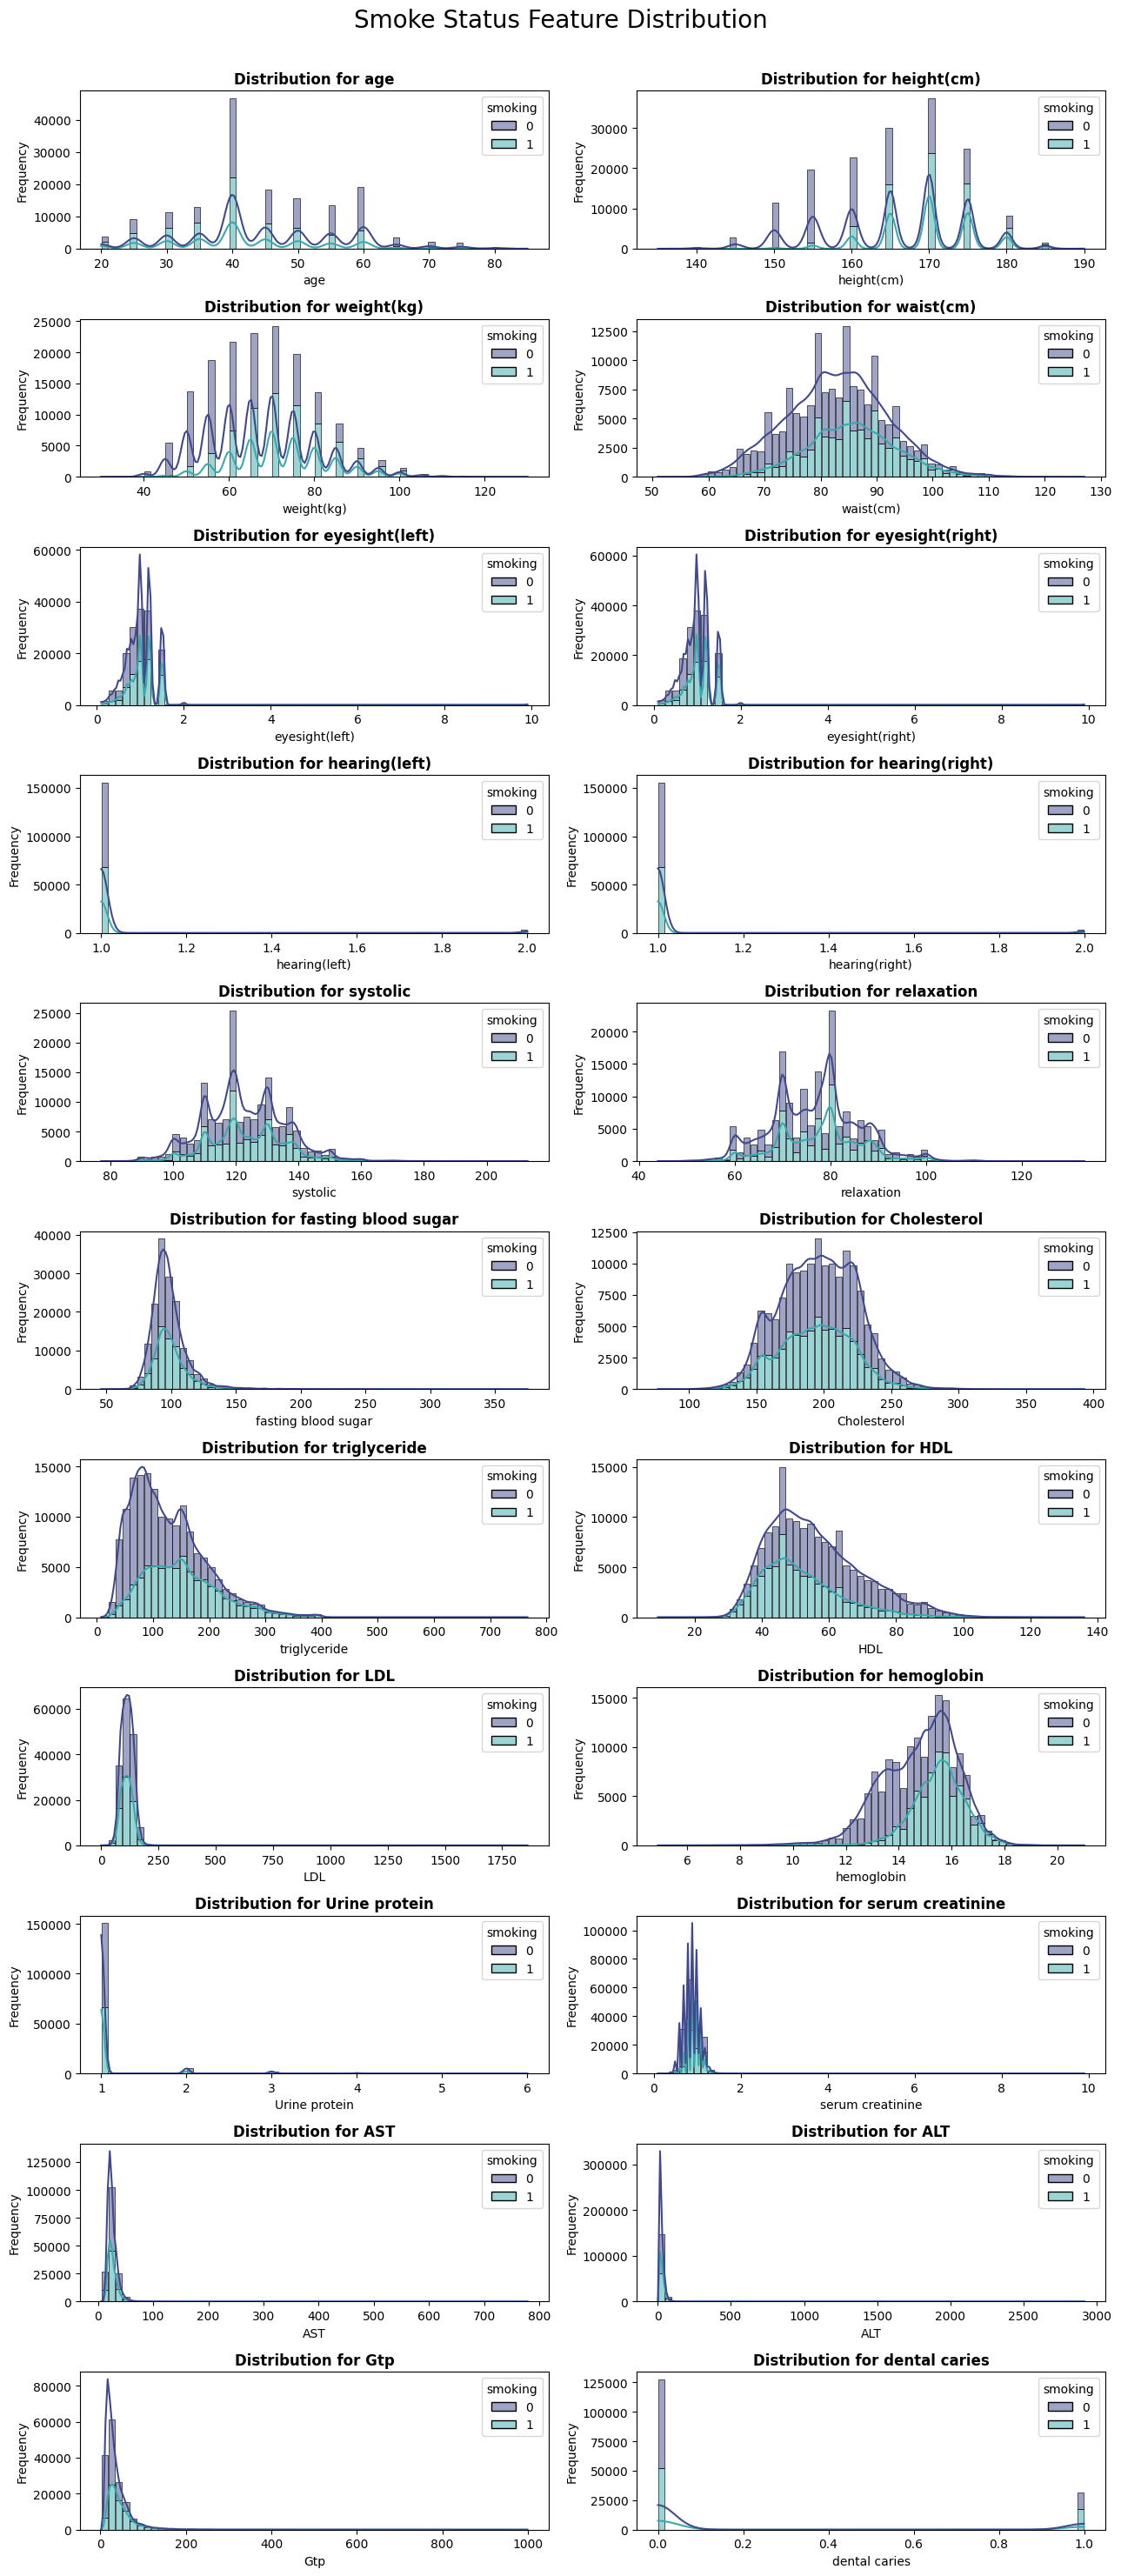

In [16]:
#이상치 확인/ 요인별 smoking 여부에 따른 분포 차이

figure, axs = plt.subplots(11, 2, figsize=(13,29))

for col, ax in zip(df_train.columns, axs.ravel()):
        sns.histplot(data=df_train, x=col, hue='smoking', palette="mako", multiple="stack", kde=True, bins=60, shrink=0.9, ax=ax)
        ax.set_title(f'Distribution for {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.suptitle("Smoke Status Feature Distribution", y=1.02, fontsize=20)
plt.show()

- 이상치가 존재하지만 수가 많지 않다.
- 흡연여부에 따라 중성지방, 헤모글로빈의 분포가 다르다.


Text(0.5, 1.07, 'Smoking Status Correlation Analysis')

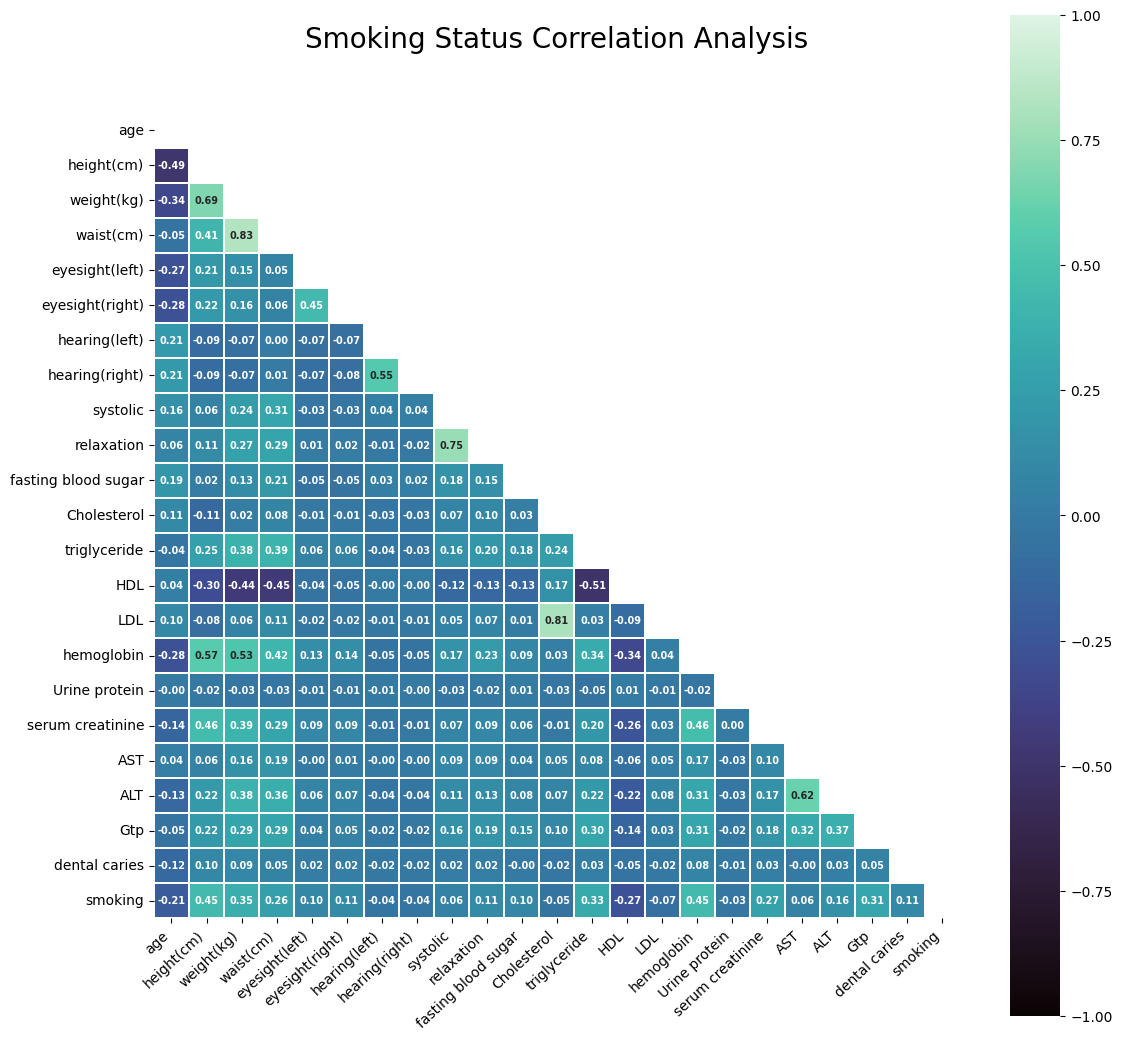

In [41]:
#상관관계
corr_matrix = df_train[df_train.columns].corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, annot=True, cmap="mako", linewidths=0.1, vmax=1.0, vmin=-1.0, linecolor='#ffffff', annot_kws={'size' : 7, 'weight' : 'bold'}, fmt=".2f", square=True, mask=mask)
plt.xticks(rotation=43, horizontalalignment='right')

plt.title("Smoking Status Correlation Analysis", y=1.07, fontsize=20)

*High Correlation*

weight-height: 0.69 \
waist-weight : 0.83 \
relaxation-systolic: 0.75\
LDL-Cholesterol: 0.81